<a href="https://colab.research.google.com/github/Zelimkhan4/API_APP/blob/laba/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [3]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [64]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [65]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [67]:
import requests

URL = 'https://api.hh.ru/vacancies'
professions = ["Аналитик", "Врач", "Кулинар", "Флорист",
               "Репетитор по математике"]
all_responces = []
for profession in professions:
  params = {
      "text": profession,
      "area": 1,
      "page": 0,
      "per_page": 10
  }
  data = requests.get(
      URL,
      params=params
  ).json()
  all_responces.append(data)
print(len(all_responces[0]))

10


(1 балл) Посчитайте сколько всего найдено вакансий:

In [68]:
sum([i["pages"] for i in all_responces])

515

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [69]:
class Company:
  def __init__(self, name, latitude=None, longitude=None):
    self.name = name
    self.latitude = latitude
    self.longitude = longitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [70]:
companies = []

for i in range(5):
  for page in all_responces[i]["items"]:
    if "address" in page["employer"]:
      companies.append(Company(page["employer"]["name"],
                               page["employer"]["address"].get("lat", None),
                               page["employer"]["address"].get("long", None)))

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [71]:
vacancies_with_address = []
for i in range(5):
  for page in all_responces[i]["items"]:
    # print(page)
    if "address" in page and page["address"] is not None and "lat" in page["address"] and page["address"]["lat"] is not None and "lng" in page["address"] and page["address"]["lng"] is not None:
      vacancies_with_address.append(page)

print(len(vacancies_with_address))

37


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [72]:
def in_mkad(vacancy) -> bool:
  lat_mkad = 55.73861111
  lng_mkad = 37.61222222
  radius_mkad = 0.46
  if (vacancy["address"]["lng"] - lng_mkad) ** 2 + (vacancy["address"]["lat"] - lat_mkad) ** 2 <= radius_mkad**2:
    return True
  return False

mkad_company = [i for i in vacancies_with_address if in_mkad(i)]

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

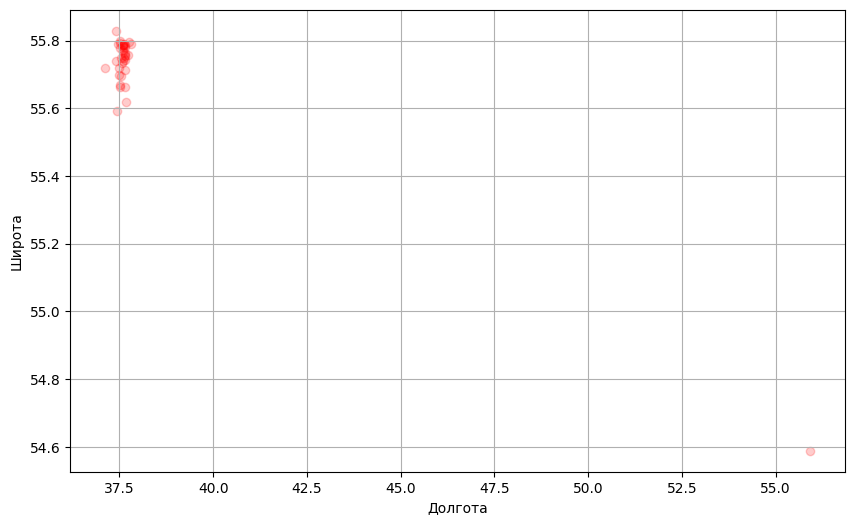

In [73]:
import matplotlib.pyplot as plt

lats = [i["address"]["lat"] for i in vacancies_with_address]
lons = [i["address"]["lng"] for i in vacancies_with_address]

plt.figure(figsize=(10, 6))
plt.scatter(lons, lats, c='r', marker='o', alpha=0.2)  # c - цвет точек, marker - форма маркера
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid(True)
plt.show()


(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [74]:
import plotly.express as px
import plotly.graph_objects as go


moscow = [55.73861111, 37.61222222]
fig = px.scatter_mapbox(
    zip(lats, lons),
    lat=0,
    lon=1,
    center=go.layout.mapbox.Center(lat=moscow[0], lon=moscow[1]),
    color_discrete_sequence=["fuchsia"],
    zoom=8,
    height=500,
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Работы проделанно не очень много, но можно понять, что вакансий по профессиям ["Аналитик", "Врач", "Кулинар", "Флорист", "Репетитор по математике"] более всего в центре, на востоке и западе. Про зарплаты по проделанной работе ничего сказать нельзя.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [4]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 173MB/s]


Создадим DataFrame:

In [5]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [6]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [7]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [8]:
diamonds = diamonds.sort_values(by="total_sales_price")
print(diamonds.head(1)["total_sales_price"])
print(diamonds.tail(1)["total_sales_price"])

0    200
Name: total_sales_price, dtype: int64
219702    1449881
Name: total_sales_price, dtype: int64


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [9]:
count = 0
for index, row in diamonds.iterrows():
  for column in row:
      if column == "unknown" or column is None:
          count += 1
print(count)

1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
columns_with_spaces = set()
for index, row in diamonds.iterrows():
  for column in diamonds.columns:
    if row[column] == "unknown" or row[column] is None:
      columns_with_spaces.add(column)
for col in columns_with_spaces:
    print(col)

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [11]:
columns = []
for column in diamonds.columns:
  if column.startswith("fancy_color_") or column.startswith("fluor_"):
    columns.append(column)
print(len(columns))

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [12]:
diamonds[columns].isin(['None', 'unknown']).eq(False).sum().sum()

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [13]:
diamonds.drop(columns=columns, inplace=True)
diamonds.to_csv('diamonds.csv', index=False)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [15]:
columns = []
for column in diamonds.columns:
  if column.startswith("culet_"):
    columns.append(column)
print(diamonds[columns].isin(['None', 'unknown']).eq(False).sum().sum())
diamonds.drop(columns=columns, inplace=True)
diamonds.to_csv('diamonds.csv', index=False)

149282


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [16]:
diamonds['total_sales_price'].sum()

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [17]:
diamonds.iloc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
21,21,Round,F,VVS1,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.4,59.0,2.83,2.85,1.74,STK,TK,200
19,19,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.8,60.0,2.81,2.83,1.83,TK,TK,200
17,17,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.2,60.0,2.92,2.94,1.79,M,M,200
15,15,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.0,2.88,2.90,1.78,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [18]:
diamonds.iloc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
17,17,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.2,60.0,2.92,2.94,1.79,M,M,200
10,10,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,62.2,58.5,2.82,2.85,1.77,STK,TK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
30,30,Round,E,VVS1,0.09,Very Good,IGI,Very Good,Very Good,unknown,60.3,61.5,2.84,2.88,1.72,TK,TK,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [19]:
diamonds.select_dtypes(include='object')

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
22,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,TK
21,Round,F,VVS1,Very Good,IGI,Very Good,Very Good,unknown,STK,TK
20,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,TN,STK
19,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,TK,TK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

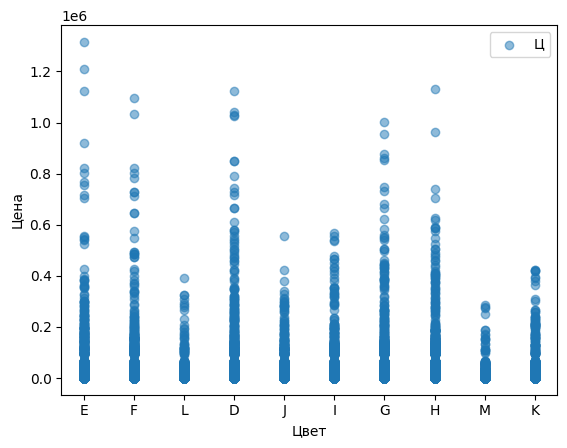

In [55]:
new_dataframe = diamonds.copy()
new_dataframe = new_dataframe[
    (new_dataframe["color"] != "unknown") & (new_dataframe["color"] is not None)
]
new_dataframe = new_dataframe[
    (new_dataframe["color"] != "total_sales_price")
    & (new_dataframe["total_sales_price"] is not None)
]
plt.scatter(new_dataframe["color"], new_dataframe["total_sales_price"],
                                                  alpha=0.5)
plt.xlabel("Цвет")
plt.ylabel("Цена")

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

Text(0, 0.5, 'Количество бриллиантов')

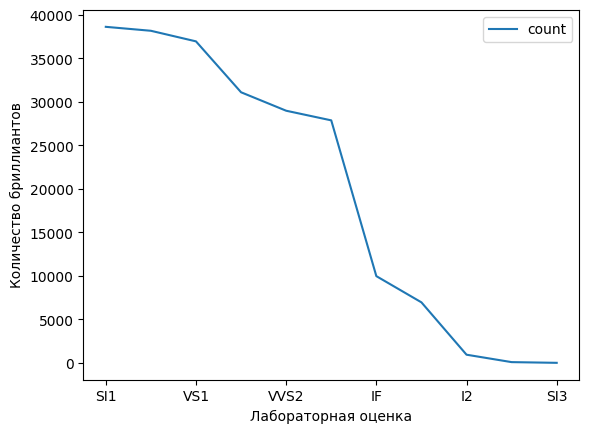

In [61]:
new_dataframe = diamonds.copy()
new_dataframe = new_dataframe[
    (new_dataframe["clarity"] != "unknown") & (new_dataframe["clarity"] is not None)
]

new_dataframe["clarity"].value_counts().plot(kind="line", legend=True)
plt.xlabel("Лабораторная оценка")
plt.ylabel("Количество бриллиантов")


(2 балла) Постройте график `вес бриллианта - стоимость`:

Text(0, 0.5, 'Цена')

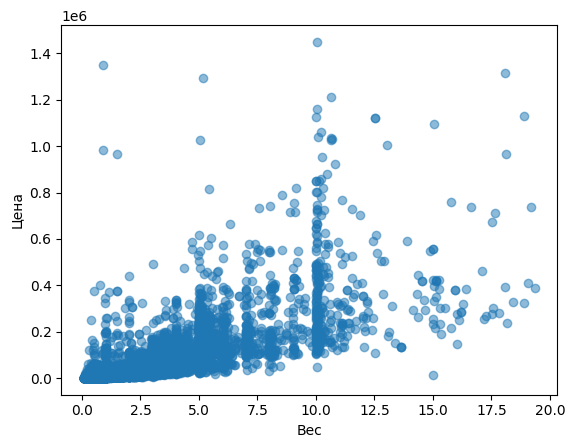

In [62]:
new_dataframe = diamonds.copy()
new_dataframe = new_dataframe[
    (new_dataframe["carat_weight"] != "unknown") &
    (new_dataframe["carat_weight"] is not None)
]
new_dataframe = new_dataframe[
    (new_dataframe["total_sales_price"] != "unknown") &
    (new_dataframe["total_sales_price"] is not None)
]
plt.scatter(new_dataframe["carat_weight"], diamonds["total_sales_price"],
            alpha=0.5)
plt.xlabel("Вес")
plt.ylabel("Цена")

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

<Axes: xlabel='cut_quality', ylabel='Количество бриллианторв'>

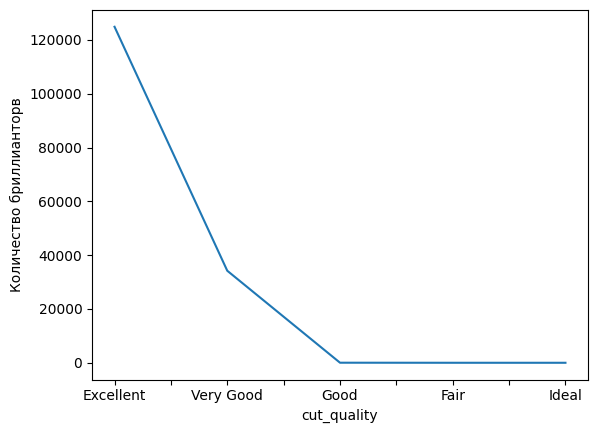

In [56]:
new_dataframe = diamonds.copy()
new_dataframe = new_dataframe[
    (new_dataframe["cut_quality"] != "unknown") &
    (new_dataframe["cut_quality"] is not None)
]
plt.xlabel("Оценка GIA")
plt.ylabel("Количество бриллианторв")
new_dataframe["cut_quality"].value_counts().plot(kind="line")

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Самые дорогие по цвету: E, F, D, G, H
Самая популярные лабораторные оценки: SI1, VS1, WS2.
самая популярная оценка: Excellent
самые не популярные оценки: Good, Fair, Ideal


## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [28]:
new_dataset = diamonds[["meas_length", "meas_width", "meas_depth", "total_sales_price"]]
new_dataset.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
22,2.80,2.81,1.77,200
21,2.83,2.85,1.74,200
20,2.87,2.88,1.76,200
19,2.81,2.83,1.83,200
18,2.91,2.92,1.78,200
17,2.92,2.94,1.79,200
16,2.88,2.91,1.80,200
15,2.88,2.90,1.78,200
14,2.81,2.84,1.79,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [29]:
new_dataset = new_dataset.sample(frac=1)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [30]:
def minkowski_sum(row):
    return (row['meas_length'] ** 3 + row['meas_width'] ** 3 +
            row['meas_depth'] ** 3) ** (1/3)

new_dataset['minkowski_sum'] = new_dataset.apply(minkowski_sum, axis=1)

(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [31]:
minkowski_price = new_dataset[['minkowski_sum', 'total_sales_price']]

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

KeyError: 'minkowski_sum'

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

In [ ]:
# your code here

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)